In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.ndimage as scim

def imshow(img, ax=None, title="", bgr=True):
    # since plt and cv2 have different RGB sorting
    if bgr:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if ax == None:
        plt.imshow(img.astype(np.uint8))
        plt.axis("off")
        plt.title(title)
    else:
        ax.imshow(img.astype(np.uint8))
        ax.set_axis_off()
        ax.set_title(title)
        
plt.rcParams["figure.figsize"] = (12,6)

#### Goal
Independently scale interest points in each image, such that the detections are repeatable across different scales. 

#### General Idea
Extract features as a variety of scales, e.g., by multiple resolutions in a image pyramid, and then matching features at the "corresponding" level

With the Harris corner detector we can find a maxima in a spatial search window, then find scale that gives local maxima of a function $f$ in both position and scale. 

#### "Blob" Detection - Laplacian of Gaussian
$$\nabla^2g(x,y,\sigma)=-(\pi\sigma^4)^{-1}(1-\frac{x^2+y^2}{2\sigma^2})\exp(-\frac{x^2+y^2}{2\sigma^2})$$

Define the __characteristic scale__ as the scale that produced peak of the Laplacian response, so that such interest points are local maxima in both position and scale

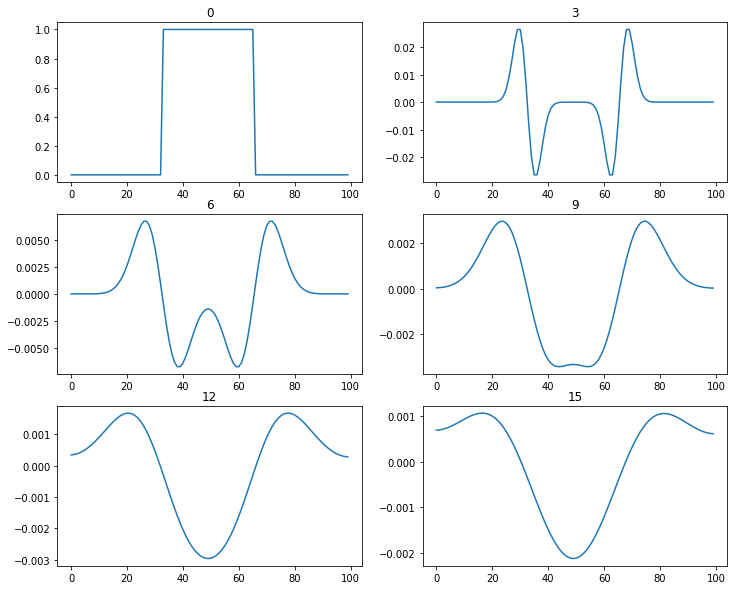

In [35]:
x = np.zeros(100)
x[33:66] = 1
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
sigma = 0
for i in range(3):
    for j in range(2):
        axs[i][j].plot(np.arange(100), scim.gaussian_laplace(x, sigma))
        axs[i][j].set_title(sigma)
        sigma += 3

#### Difference of Gaussian
__Problem with LoG__: LoG is not separable, and larger the $\sigma$, larger the filter is. 

Consider the approximation by finite differencing of Gaussian
$$DoG := G(x,y,k\sigma) - G(x,y,\sigma)$$
where $G$ is the Gaussian function
DoG is separable since Gaussian is separable, hence its difference. 


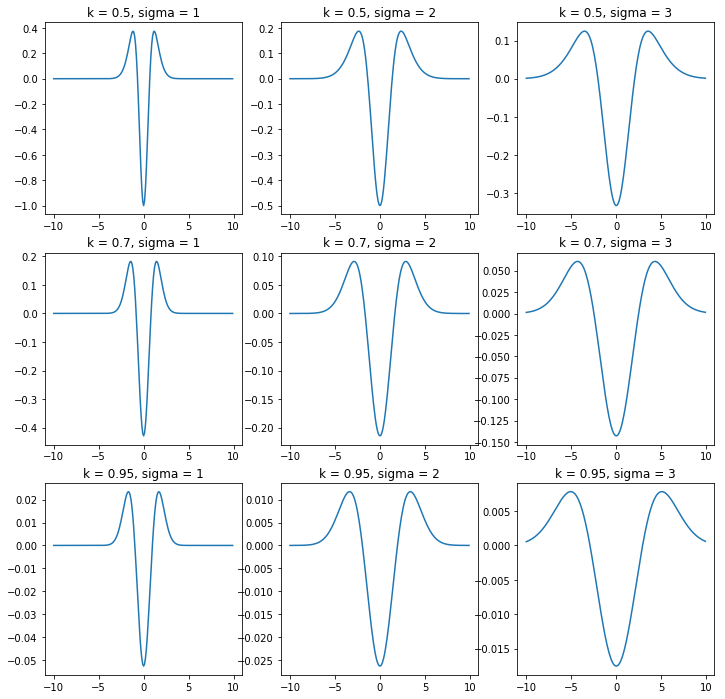

In [75]:
x = np.arange(-10, 10, 0.1)
sigmas, ks = [1, 2, 3], [0.5, 0.7, 0.95]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in range(9):
    sigma = sigmas[i % 3]
    k = ks[i // 3]
    g = 1 / sigma * np.exp(-(x ** 2) / (2 * (sigma ** 2)))
    g2 = 1 / (sigma * k) * np.exp(-(x ** 2) / (2 * ((sigma*k) ** 2)))
    axs[i//3][i%3].plot(x, g-g2);
    axs[i//3][i%3].set_title("k = " +  str(k) + ", " + "sigma = " + str(sigma))